In [ ]:
!pip install gymnasium[all]
!pip install autorom[accept-rom-license]
!pip install stable-baselines3
!pip install PyVirtualDisplay
!sudo apt-get install xvfb

In [2]:
import gymnasium as gym
from stable_baselines3 import DQN

In [3]:
env = gym.make("MountainCar-v0")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
observation_space = env.observation_space
action_space = env.action_space

In [5]:
model = DQN("MlpPolicy", env, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [13]:
timestamp=20000
model.learn(total_timesteps=timestamp, log_interval=5000)
model.save("dqn_mountain_car")

In [14]:
import gym
from IPython import display
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt
from matplotlib import animation

In [15]:
d = Display()
d.start()

env = gym.make('MountainCar-v0')

obs = env.reset()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [16]:
img = []
for _ in range(100):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated = env.step(action)

    display.clear_output(wait=True)
    img.append(env.render('rgb_array'))

    if d:
        env.reset()

/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


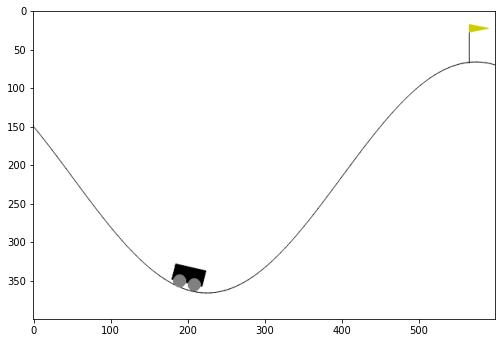

In [17]:
dpi = 72
interval = 50

plt.figure(figsize=(img[0].shape[1] / dpi, img[0].shape[0] / dpi), dpi=dpi)
patch = plt.imshow(img[0])
plt.axis = ('off')
animate = lambda i: patch.set_data(img[i])
ani = animation.FuncAnimation(plt.gcf(), animate, frames=len(img), interval=interval)
display.display(display.HTML(ani.to_jshtml()))

In [18]:
env.close()